In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from SIS_sim import SIS_sim
from me_analysis import me_analysis
import pandas as pd
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
%matplotlib inline
dir1 = 'npzfile\\'
dir2 = 'pngfile\\'
axisfont={'family':'Times New Roman',
     'style':'normal',
    'weight':'bold',
      'color':'black',
      'size':14}#轴标题

noticefont={'family':'Times New Roman',
     'style':'normal',
    'weight':'normal',
      'color':'black',
      'size':15}#注释
chfont={'family':'Times New Roman',
     'style':'normal',
    'weight':'normal',
      'color':'black',
      'size':14}#注释

In [53]:
lambda1_array_me = np.linspace(0.25,2.25,50)
lambda2_array = np.arange(0.5,3.5,0.5)
N = 100
k = 6
NetworkType='er'
p_ws = 0.1
alpha1 = 0.5
me_dict1={}
network={'NetworkType':NetworkType,
         'N':N,
         'k':k,
         'p_ws':p_ws,
         #'p_n':p_n,
         'strategy':'random',
         #'p_ws':p_ws,
         #'p':p,
         'p_n':2/6
    }
for lambda2 in lambda2_array:
    me_dict1[str(round(lambda2,1))]=[]
    for lambda1 in lambda1_array_me:
        param ={'rho0':0.1,
                't0':1000,
                'lambda1':lambda1,
                'lambda2':lambda2,
                #'beta_1':0.2,
                #'lambda2':lambda2,
                #'beta_2':0.2,
                'mu':0.3,
                'p_n':2/6,
                'simplex':2,
                'gamma1':1,
                'gamma2':1,
                'alpha1':alpha1
                }
        sis = SIS_sim(network,param)
        me_dict1[str(round(lambda2,1))].append(sis.rho_steady)
me_dict1[str(round(0,1))]=[]
for lambda1 in lambda1_array_me:
        param ={'rho0':0.1,
                't0':1000,
                'lambda1':lambda1,
                'lambda2':0,
                #'beta_1':0.2,
                #'lambda2':lambda2,
                #'beta_2':0.2,
                'mu':0.3,
                'p_n':2/6,
                'simplex':2,
                'gamma1':1,
                'gamma2':1,
                'alpha1':alpha1
                }
        sis = SIS_sim(network,param)
        me_dict1[str(round(0,1))].append(sis.rho_steady)

In [57]:
lambda1_array = np.arange(0.25,2.25,0.25)
lambda1_array_1 = [0.80,0.90]
lambda2_array = np.arange(0.5,3.5,0.5)
plot_dict1={}
for lambda2 in lambda2_array:
    plot_dict1[str(round(lambda2,1))]=[]
    for lambda1 in lambda1_array:
        sis = pickle.load(open(dir1+"2simplex_"+str(round(lambda1,2))+"_"+str(round(lambda2,1))+".pkl", 'rb'))
        plot_dict1[str(round(lambda2,1))].append(sis.rho_steady_from_sim*1.25)
    for lambda1 in lambda1_array_1:
        sis = pickle.load(open(dir1+"2simplex_new_"+str(round(lambda1,2))+"_"+str(round(lambda2,1))+".pkl", 'rb'))
        plot_dict1[str(round(lambda2,1))].append(sis.rho_steady_from_sim*1.25)
        

In [58]:
plot_dict1[str(round(1.5,1))][-1]=0
plot_dict1[str(round(0.5,1))][-1]=0
plot_dict1[str(round(0.5,1))][3]=0
plot_dict1[str(round(1.5,1))][-4]=0.6

In [47]:
plot_dict2 = {}
plot_dict2_max = {}
plot_dict2_min = {}
for NetworkType in ['er','ws','re']:
    plot_dict2[NetworkType] = np.zeros(6)
    plot_dict2_max[NetworkType] = [np.zeros(10) for i in range(6)]
    plot_dict2_min[NetworkType] = [np.zeros(10) for i in range(6)]
    k1 = 0
    for nn in range(1,11):
        k = 0
        for lambda1 in np.arange(0.5,3.5,0.5):
            sis_load = pickle.load(open(dir1+"random_"+NetworkType+"_"+str(round(lambda1,1))+'_'+str(nn)+".pkl", 'rb'))
            if sis_load.rho_steady_from_sim == 0:
                plot_dict2[NetworkType][k] += 0
                plot_dict2_max[NetworkType][k][k1] = 0
                plot_dict2_min[NetworkType][k][k1] = 0
            else:
                rho_steady = sis_load.rho_steady_from_sim*1.2
                plot_dict2[NetworkType][k] += rho_steady
                plot_dict2_max[NetworkType][k][k1] = rho_steady
                plot_dict2_min[NetworkType][k][k1] = rho_steady
            k += 1
        k1 += 1
    plot_dict2[NetworkType] = plot_dict2[NetworkType]/10
    for i in range(6):
        plot_dict2_max[NetworkType][i] = np.max(plot_dict2_max[NetworkType][i])
        plot_dict2_min[NetworkType][i] = np.min(plot_dict2_min[NetworkType][i])

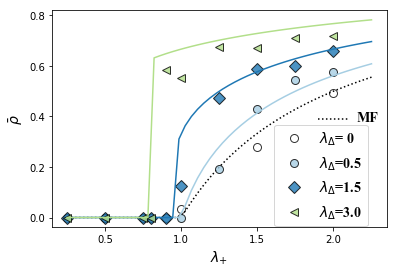

In [75]:
colors = sns.color_palette('Paired',3)
markers = ['o','D','<']
fig=plt.figure()
ax = fig.add_subplot(111)
ax.plot(np.arange(0.5,2.5,0.5),plot_dict2['re'][:-2],'o',label='$\\lambda_{\\Delta}$'+'= 0',marker='o',color='black',mfc='white',markersize=8,alpha=0.8,linewidth=1.5)
ax.plot(lambda1_array_me,me_dict1[str(round(0,1))],linestyle=':',color='black')
k = 0
for lambda2 in [0.5,1.5,3.0]:
    ax.plot(list(lambda1_array)+lambda1_array_1,plot_dict1[str(round(lambda2,1))],'o',label='$\\lambda_{\\Delta}$'+'='+str(lambda2),marker=markers[k],color='black',mfc=colors[k],markersize=8,alpha=0.8,linewidth=1.5)
    ax.plot(lambda1_array_me,me_dict1[str(round(lambda2,1))],'-',color=colors[k])
    k += 1
ax.set_xticks([0.5,1,1.5,2])
ax.set_yticks([0,0.2,0.4,0.6,0.8])
ax.plot([1.9,2.1],[0.39,0.39],color = 'black',linestyle=':')
ax.text(2.15,0.38,'MF',chfont)
fig.legend(loc=(0.69,0.17),prop={'family' : 'Times New Roman', 'size' : 14})
ax.set_xlabel('$\\lambda_{+}$',axisfont)
ax.set_ylabel('$\\bar{\\rho}$',axisfont)
fig.savefig(dir2+"二阶传播.png",dpi=500)
fig.savefig(dir2+"二阶传播.pdf",dpi=500)

In [3]:
plot_dict3 = np.load(dir1+"rho_df.npz",allow_pickle=True)
rho2_df = plot_dict3['rho2_df']
rho3_df = plot_dict3['rho3_df']
p_n_array = plot_dict3['p_n_array']
beta_delta = plot_dict3['beta_delta']
n = rho2_df.shape[0]-1

In [4]:
rho2_df = pd.DataFrame(rho2_df)
rho2_df.index=["%.2f"%p_n for p_n in p_n_array]
rho2_df.columns = ["%.2f"%beta_delta0 for beta_delta0 in beta_delta]
rho3_df = pd.DataFrame(rho3_df)
rho3_df.index=["%.2f"%p_n for p_n in p_n_array]
rho3_df.columns = ["%.2f"%beta_delta0 for beta_delta0 in beta_delta]

In [5]:
plot_dict4 = np.load(dir1+"rho_steady_me.npz",allow_pickle=True)
rho_steady_me_list = plot_dict4['rho_steady_me_list']
rho0_list = plot_dict4['rho0_list']

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:2117: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  warnings.warn("This figure was using constrained_layout==True, "


Text(0,0.5,'$\\rho$')

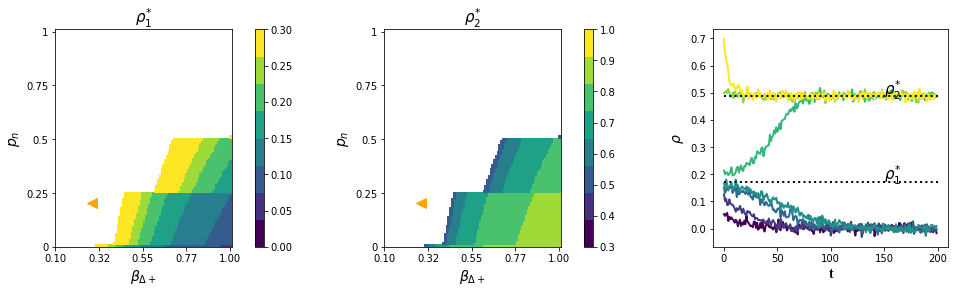

In [6]:
viridis = cm.get_cmap('viridis', 8)
newcolors = viridis(np.linspace(0, 1, 8))
newcmp = ListedColormap(newcolors)

fig,ax=plt.subplots(1,3,figsize=(3* 4 + 4,4),constrained_layout=True, squeeze=False)
fig.subplots_adjust(wspace =0.4, hspace =0)
ax1,ax2,ax3=ax.flat[0],ax.flat[1],ax.flat[2]
psm = ax1.pcolormesh(rho2_df, cmap=newcmp, rasterized=True, vmin=0, vmax=0.3)
ax1.set_xticks([0,n/4,n/2,n*3/4,n])
ax1.set_yticks([0,n/4,n/2,n*3/4,n])
ax1.set_xticklabels([rho3_df.columns[int(i)] for i in [0,n/4,n/2,n*3/4,n]])
ax1.set_yticklabels([0,0.25,0.5,0.75,1])
ax1.set_xlabel("$\\beta_{\\Delta+}$",axisfont)
ax1.set_ylabel("$p_{n}$",axisfont)
fig.colorbar(psm, ax=ax1,aspect=25,pad=0.1)
#ax1.plot([8,8],[0,50],linestyle=':',color='black',linewidth=2)
#ax1.text(8.5,40,'$\\beta_{+}$'+'=0.24',noticefont)
ax1.plot(21,20,'<',color='orange',mfc='orange',markersize=10)
viridis = cm.get_cmap('viridis', 8)
newcolors = viridis(np.linspace(0, 1, 8))
newcmp = ListedColormap(newcolors)

psm = ax2.pcolormesh(rho3_df, cmap=newcmp, rasterized=True, vmin=0.3, vmax=1)
ax2.set_xticks([0,n/4,n/2,n*3/4,n])
ax2.set_yticks([0,n/4,n/2,n*3/4,n])
ax2.set_xticklabels([rho3_df.columns[int(i)] for i in [0,n/4,n/2,n*3/4,n]])
ax2.set_yticklabels([0,0.25,0.5,0.75,1])
ax2.set_xlabel("$\\beta_{\\Delta+}$",axisfont)
ax2.set_ylabel("$p_{n}$",axisfont)
#ax2.plot([8,8],[0,50],linestyle=':',color='black',linewidth=2)
#ax2.text(8.5,40,'$\\beta_{+}$'+'=0.24',noticefont)
ax2.plot(21,20,'<',color='orange',mfc='orange',markersize=10)
fig.colorbar(psm, ax=ax2,aspect=25,pad=0.1)
ax1.set_title("$\\rho _{1}^{*}$",noticefont)
ax2.set_title("$\\rho _{2}^{*}$",noticefont)

viridis = cm.get_cmap('viridis', 7)
colors = viridis(np.linspace(0, 1, 7))
k = 0
for rho_steady_me in rho_steady_me_list:
    ax3.plot([i+np.random.normal(loc =0.0,scale= 0.01) for i in rho_steady_me[:200]],color=colors[k],linewidth=2)
    k += 1
ax3.plot([0,200],[0.173,0.173],linestyle=':',color='black',linewidth=2)
ax3.plot([0,200],[0.487,0.487],linestyle=':',color='black',linewidth=2)
ax3.text(150,0.18,"$\\rho _{1}^{*}$",noticefont)
ax3.text(150,0.49,"$\\rho _{2}^{*}$",noticefont)
ax3.set_xlabel("t",axisfont)
ax3.set_ylabel("$\\rho$",axisfont)
#fig.savefig(dir2+"双稳态.png",dpi=1000)
#fig.savefig(dir2+"双稳态.pdf",dpi=1000)

Text(0,0.5,'$\\rho$')

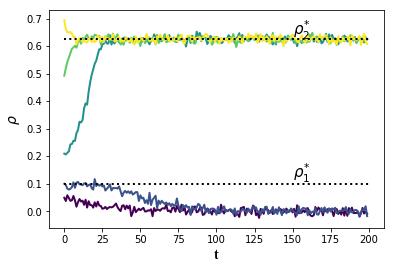

In [165]:
viridis = cm.get_cmap('viridis', 5)
colors = viridis(np.linspace(0, 1, 5))
fig = plt.figure()
ax = fig.add_subplot(111)
k = 0
for rho_steady_me in rho_steady_me_list:
    ax.plot([i+np.random.normal(loc =0.0,scale= 0.01) for i in rho_steady_me[:200]],color=colors[k],linewidth=2)
    k += 1
ax.plot([0,200],[0.1,0.1],linestyle=':',color='black',linewidth=2)
ax.plot([0,200],[0.624,0.624],linestyle=':',color='black',linewidth=2)
ax.text(150,0.12,"$\\rho _{1}^{*}$",noticefont)
ax.text(150,0.64,"$\\rho _{2}^{*}$",noticefont)
ax.set_xlabel("t",axisfont)
ax.set_ylabel("$\\rho$",axisfont)

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:2117: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  warnings.warn("This figure was using constrained_layout==True, "


Text(0.5,1,'$\\rho _{2}^{*}$')

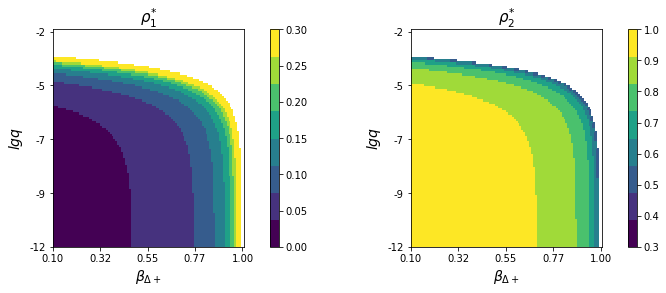

In [20]:
plot_dict5 = np.load(dir1+"rho_df_q.npz",allow_pickle=True)
rho2_df = plot_dict5['rho2_df']
rho3_df = plot_dict5['rho3_df']
q_array = plot_dict5['q_array']
beta_delta = plot_dict5['beta_delta']
n = rho2_df.shape[0]-1
rho2_df = pd.DataFrame(rho2_df)
rho2_df.index=["%.0f"%np.log(q) for q in q_array]
rho2_df.columns = ["%.2f"%beta_delta0 for beta_delta0 in beta_delta]
rho3_df = pd.DataFrame(rho3_df)
rho3_df.index=["%.0f"%np.log(q) for q in q_array]
rho3_df.columns = ["%.2f"%beta_delta0 for beta_delta0 in beta_delta]
viridis = cm.get_cmap('viridis', 8)
newcolors = viridis(np.linspace(0, 1, 8))
newcmp = ListedColormap(newcolors)
fig,ax=plt.subplots(2,2,figsize=(4* 4 + 3,4),constrained_layout=True, squeeze=False)
fig.subplots_adjust(wspace =0.4, hspace =0)
ax1,ax2,ax3,ax4=ax.flat[0],ax.flat[1],ax.flat[2],ax.flat[3]
psm = ax1.pcolormesh(rho2_df, cmap=newcmp, rasterized=True, vmin=0, vmax=0.3)
ax1.set_xticks([0,n/4,n/2,n*3/4,n])
ax1.set_yticks([0,n/4,n/2,n*3/4,n])
ax1.set_xticklabels([rho3_df.columns[int(i)] for i in [0,n/4,n/2,n*3/4,n]])
ax1.set_yticklabels([rho3_df.index[int(i)] for i in [0,n/4,n/2,n*3/4,n]])
ax1.set_xlabel("$\\beta_{\\Delta+}$",axisfont)
ax1.set_ylabel("$lgq$",axisfont)
fig.colorbar(psm, ax=ax1,aspect=25,pad=0.1)

psm = ax2.pcolormesh(rho3_df, cmap=newcmp, rasterized=True, vmin=0.3, vmax=1)
ax2.set_xticks([0,n/4,n/2,n*3/4,n])
ax2.set_yticks([0,n/4,n/2,n*3/4,n])
ax2.set_xticklabels([rho3_df.columns[int(i)] for i in [0,n/4,n/2,n*3/4,n]])
ax2.set_yticklabels([rho3_df.index[int(i)] for i in [0,n/4,n/2,n*3/4,n]])
ax2.set_xlabel("$\\beta_{\\Delta+}$",axisfont)
ax2.set_ylabel("$lgq$",axisfont)
#ax2.plot([8,8],[0,50],linestyle=':',color='black',linewidth=2)
#ax2.text(8.5,40,'$\\beta_{+}$'+'=0.24',noticefont)
#ax2.plot(21,20,'<',color='orange',mfc='orange',markersize=10)
fig.colorbar(psm, ax=ax2,aspect=25,pad=0.1)
ax1.set_title("a.dense:"+"$\\rho _{1}^{*}$",fontdict=noticefont,loc='left')
ax2.set_title("b.dense:"+"$\\rho _{2}^{*}$",fontdict=noticefont,loc='left')

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:2117: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  warnings.warn("This figure was using constrained_layout==True, "


Text(0.5,1,'$\\rho _{2}^{*}$')

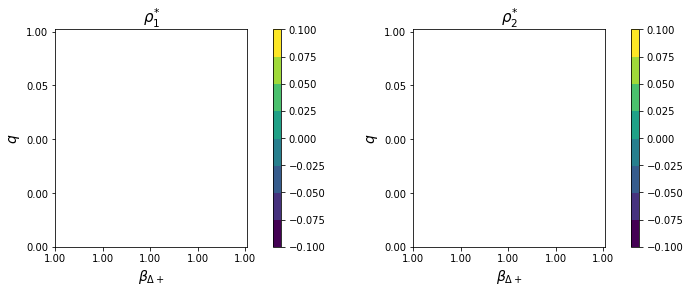

In [35]:
plot_dict5 = np.load(dir1+"rho_df_q_1.npz",allow_pickle=True)
rho2_df = plot_dict5['rho2_df']
rho3_df = plot_dict5['rho3_df']
q_array = plot_dict5['q_array']
beta_delta = plot_dict5['beta_delta']
n = rho2_df.shape[0]-1
rho2_df = pd.DataFrame(rho2_df)
rho2_df.index=["%.2f"%q for q in q_array]
rho2_df.columns = ["%.2f"%beta_delta0 for beta_delta0 in beta_delta]
rho3_df = pd.DataFrame(rho3_df)
rho3_df.index=["%.2f"%q for q in q_array]
rho3_df.columns = ["%.2f"%beta_delta0 for beta_delta0 in beta_delta]
viridis = cm.get_cmap('viridis', 8)
newcolors = viridis(np.linspace(0, 1, 8))
newcmp = ListedColormap(newcolors)
fig,ax=plt.subplots(1,2,figsize=(2* 4 + 3,4),constrained_layout=True, squeeze=False)
fig.subplots_adjust(wspace =0.4, hspace =0)
ax1,ax2=ax.flat[0],ax.flat[1]
psm = ax1.pcolormesh(rho2_df, cmap=newcmp, rasterized=True, vmin=np.min(np.min(rho2_df)), vmax=np.max(np.max(rho2_df)))
ax1.set_xticks([0,n/4,n/2,n*3/4,n])
ax1.set_yticks([0,n/4,n/2,n*3/4,n])
ax1.set_xticklabels([rho3_df.columns[int(i)] for i in [0,n/4,n/2,n*3/4,n]])
ax1.set_yticklabels([rho3_df.index[int(i)] for i in [0,n/4,n/2,n*3/4,n]])
ax1.set_xlabel("$\\beta_{\\Delta+}$",axisfont)
ax1.set_ylabel("$q$",axisfont)
fig.colorbar(psm, ax=ax1,aspect=25,pad=0.1)

psm = ax2.pcolormesh(rho3_df, cmap=newcmp, rasterized=True, vmin=np.min(np.min(rho3_df)), vmax=np.max(np.max(rho3_df)))
ax2.set_xticks([0,n/4,n/2,n*3/4,n])
ax2.set_yticks([0,n/4,n/2,n*3/4,n])
ax2.set_xticklabels([rho3_df.columns[int(i)] for i in [0,n/4,n/2,n*3/4,n]])
ax2.set_yticklabels([rho3_df.index[int(i)] for i in [0,n/4,n/2,n*3/4,n]])
ax2.set_xlabel("$\\beta_{\\Delta+}$",axisfont)
ax2.set_ylabel("$q$",axisfont)
#ax2.plot([8,8],[0,50],linestyle=':',color='black',linewidth=2)
#ax2.text(8.5,40,'$\\beta_{+}$'+'=0.24',noticefont)
#ax2.plot(21,20,'<',color='orange',mfc='orange',markersize=10)
fig.colorbar(psm, ax=ax2,aspect=25,pad=0.1)
ax1.set_title("$\\rho _{1}^{*}$",noticefont)
ax2.set_title("$\\rho _{2}^{*}$",noticefont)

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:2117: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  warnings.warn("This figure was using constrained_layout==True, "


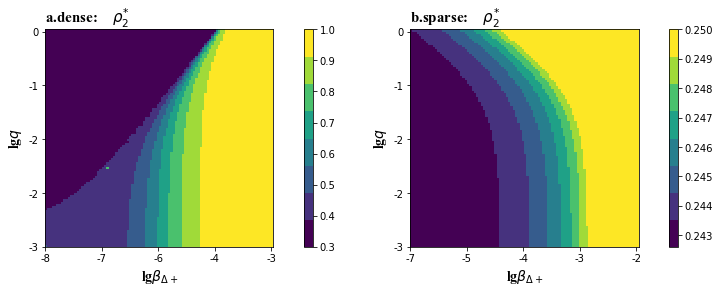

In [52]:
plot_dict5 = np.load(dir1+"rho_df_q.npz",allow_pickle=True)
rho2_df = plot_dict5['rho2_df']
rho3_df = plot_dict5['rho3_df']
q_array = plot_dict5['q_array']
beta_delta = plot_dict5['beta_delta']
n = rho2_df.shape[0]-1
rho2_df = pd.DataFrame(rho2_df)
rho2_df.index=["%.0f"%np.log10(q) for q in q_array]
rho2_df.columns = ["%.0f"%np.log10(beta_delta0) for beta_delta0 in beta_delta]
rho3_df = pd.DataFrame(rho3_df)
rho3_df.index=["%.0f"%np.log10(q) for q in q_array]
rho3_df.columns = ["%.0f"%np.log10(beta_delta0) for beta_delta0 in beta_delta]
viridis = cm.get_cmap('viridis', 8)
newcolors = viridis(np.linspace(0, 1, 8))
newcmp = ListedColormap(newcolors)
fig,ax=plt.subplots(1,2,figsize=(3* 3 + 3,4),constrained_layout=True, squeeze=False)
fig.subplots_adjust(wspace =0.2, hspace =0.4)
ax2,ax4=ax.flat[0],ax.flat[1]

psm = ax2.pcolormesh(rho3_df, cmap=newcmp, rasterized=True, vmin=0.3, vmax=1)
ax2.set_xticks([0,n/4,n/2,n*3/4,n])
ax2.set_yticks([0,n/4,n/2,n*3/4,n])
ax2.set_xticklabels([rho3_df.columns[int(i)] for i in [0,n/4,n/2,n*3/4,n]])
ax2.set_yticklabels([rho3_df.index[int(i)] for i in [0,n/4,n/2,n*3/4,n]])
ax2.set_xlabel("lg$\\beta_{\\Delta+}$",axisfont)
ax2.set_ylabel("lg$q$",axisfont)
#ax2.plot([8,8],[0,50],linestyle=':',color='black',linewidth=2)
#ax2.text(8.5,40,'$\\beta_{+}$'+'=0.24',noticefont)
#ax2.plot(21,20,'<',color='orange',mfc='orange',markersize=10)
fig.colorbar(psm, ax=ax2,aspect=25,pad=0.1)
ax2.set_title("a.dense:    "+"$\\rho _{2}^{*}$",fontdict=noticefont,loc='left')


plot_dict5 = np.load(dir1+"rho_df_q_1.npz",allow_pickle=True)
rho2_df = plot_dict5['rho2_df']
rho3_df = plot_dict5['rho3_df']
q_array = plot_dict5['q_array']
beta_delta = plot_dict5['beta_delta']
n = rho2_df.shape[0]-1
rho2_df = pd.DataFrame(rho2_df)
rho2_df.index=["%.0f"%np.log10(q) for q in q_array]
rho2_df.columns = ["%.0f"%np.log10(beta_delta0) for beta_delta0 in beta_delta]
rho3_df = pd.DataFrame(rho3_df)
rho3_df.index=["%.0f"%np.log10(q) for q in q_array]
rho3_df.columns = ["%.0f"%np.log10(beta_delta0) for beta_delta0 in beta_delta]
viridis = cm.get_cmap('viridis', 8)
newcolors = viridis(np.linspace(0, 1, 8))
newcmp = ListedColormap(newcolors)

psm = ax4.pcolormesh(rho3_df, cmap=newcmp, rasterized=True, vmin=np.min(np.min(rho3_df)), vmax=0.25)
ax4.set_xticks([0,n/4,n/2,n*3/4,n])
ax4.set_yticks([0,n/4,n/2,n*3/4,n])
ax4.set_xticklabels([rho3_df.columns[int(i)] for i in [0,n/4,n/2,n*3/4,n]])
ax4.set_yticklabels([rho3_df.index[int(i)] for i in [0,n/4,n/2,n*3/4,n]])
ax4.set_xlabel("lg$\\beta_{\\Delta+}$",axisfont)
ax4.set_ylabel("lg$q$",axisfont)
#ax2.plot([8,8],[0,50],linestyle=':',color='black',linewidth=2)
#ax2.text(8.5,40,'$\\beta_{+}$'+'=0.24',noticefont)
#ax2.plot(21,20,'<',color='orange',mfc='orange',markersize=10)
fig.colorbar(psm, ax=ax4,aspect=25,pad=0.1)
ax4.set_title("b.sparse:    "+"$\\rho _{2}^{*}$",fontdict=noticefont,loc='left')
fig.savefig(dir2+"二阶传播q值.png",dpi=500)
fig.savefig(dir2+"二阶传播q值.pdf",dpi=500)

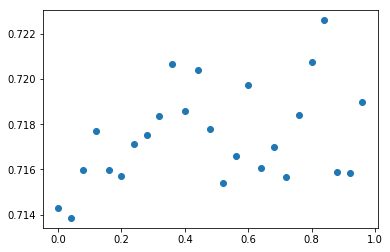

In [57]:
alpah1_array = np.arange(0,25,1)/25
rho_steady_list = []
for alpha1 in np.arange(0,25,1)/25:
    sis_load = pickle.load(open(dir1+"prior_simplex2_"+str(round(alpha1,2))+"_"+str(1)+".pkl", 'rb'))
    rho_steady_list.append(sis_load.rho_steady_from_sim)
plt.plot(alpah1_array,rho_steady_list,'o')

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:2117: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  warnings.warn("This figure was using constrained_layout==True, "


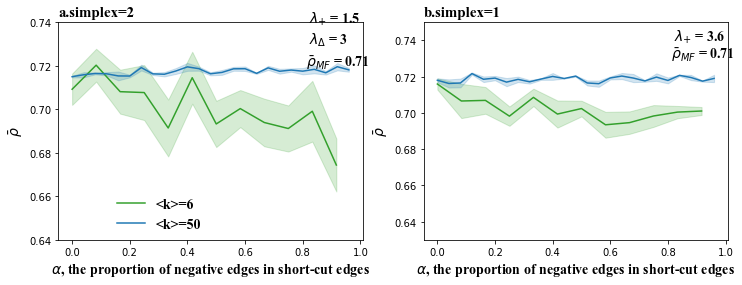

In [15]:
fig,ax=plt.subplots(1,2,figsize=(3* 3 + 3,4),constrained_layout=True, squeeze=False)
fig.subplots_adjust(wspace =0.2, hspace =0.4)
ax1,ax2=ax.flat[0],ax.flat[1]

alpha1_array = np.arange(0,3,0.25)/3
rho_steady_list = [np.zeros(10) for i in range(len(alpha1_array))]
k1 = 0
for nn in range(1,11):
    k2 = 0
    for alpha1 in alpha1_array:
        sis_load = pickle.load(open(dir1+"sparse\\"+"prior_simplex2_"+str(round(alpha1,2))+"_"+str(nn)+".pkl", 'rb'))
        rho_steady_list[k2][k1]=sis_load.rho_steady_from_sim*1.5
        k2 += 1
    k1 += 1
colors=sns.color_palette('Paired',4)
color0 = colors[3]
x = np.arange(0,3,0.25)/3
y = [np.mean(l) for l in rho_steady_list]
#y[5] = 0.69
#y[7]= 0.68
y1 = [np.mean(l)+1.96/np.sqrt(10)*np.std(l) for l in rho_steady_list]
y2 =  [np.mean(l)-1.96/np.sqrt(10)*np.std(l) for l in rho_steady_list]
ax1.plot(x, y, '-',color=color0,label="<k>=6")
ax1.fill_between(x, y2, y1,color=color0,alpha=0.2)
ax1.set_xlabel('$\\alpha$'+', the proportion of negative edges in short-cut edges',axisfont)
ax1.set_ylabel('$\\bar{\\rho}$',axisfont)

alpha1_array = np.arange(0,25,1)/25
rho_steady_list = [np.zeros(3) for i in range(len(alpha1_array))]
k1 = 0
for nn in range(1,4):
    k2 = 0
    for alpha1 in alpha1_array:
        sis_load = pickle.load(open(dir1+"prior_simplex2_"+str(round(alpha1,2))+"_"+str(nn)+".pkl", 'rb'))
        rho_steady_list[k2][k1]=sis_load.rho_steady_from_sim
        k2 += 1
    k1 += 1
color0 = colors[1]
x = np.arange(0,25,1)/25
y = [np.mean(l) for l in rho_steady_list]
y1 = [np.mean(l)+1.96/np.sqrt(10)*np.std(l) for l in rho_steady_list]
y2 =  [np.mean(l)-1.96/np.sqrt(10)*np.std(l) for l in rho_steady_list]
ax1.plot(x, y, '-',color=color0,label="<k>=50")
ax1.fill_between(x, y2, y1,color=color0,alpha=0.2)
ax1.set_xlabel('$\\alpha$'+', the proportion of negative edges in short-cut edges',axisfont)
ax1.set_ylabel('$\\bar{\\rho}$',axisfont)
ax1.set_yticks([0.64,0.66,0.68,0.7,0.72,0.74])

ax1.text(0.81,0.74,' $\\lambda_{+}$'+' = 1.5',chfont)
ax1.text(0.81,0.73,' $\\lambda_{\\Delta}$'+' = 3',chfont)
ax1.text(0.81,0.72,'$\\bar{\\rho}_{MF}$'+' = 0.71',chfont)
plt.ylim([0.63,0.75])



alpha1_array = np.arange(0,3,0.25)/3
rho_steady_list = [np.zeros(10) for i in range(len(alpha1_array))]
k1 = 0
for nn in range(1,11):
    k2 = 0
    for alpha1 in alpha1_array:
        sis_load = pickle.load(open(dir1+"prior_simplex1_sparse_"+str(round(alpha1,2))+"_"+str(nn)+".pkl", 'rb'))
        rho_steady_list[k2][k1]=sis_load.rho_steady_from_sim*1.17
        k2 += 1
    k1 += 1

colors=sns.color_palette('Paired',4)
color0 = colors[3]
x = np.arange(2.75,-0.25,-0.25)/3
y = [np.mean(l) for l in rho_steady_list]
y1 = [np.mean(l)+1.96*np.std(l)/np.sqrt(10) for l in rho_steady_list]
y2 =  [np.mean(l)-1.96*np.std(l)/np.sqrt(10) for l in rho_steady_list]
ax2.plot(x, y, '-',color=color0)
ax2.fill_between(x, y2, y1,color=color0,alpha=0.2)
ax2.set_xlabel('$\\alpha$'+', the proportion of negative edges in short-cut edges',axisfont)
ax2.set_ylabel('$\\bar{\\rho}$',axisfont)

alpha1_array = np.arange(0,25,1)/25
rho_steady_list = [np.zeros(3) for i in range(len(alpha1_array))]
k1 = 0
for nn in range(1,4):
    k2 = 0
    for alpha1 in alpha1_array:
        sis_load = pickle.load(open(dir1+"prior_simplex1_dense_"+str(round(alpha1,2))+"_"+str(nn)+".pkl", 'rb'))
        rho_steady_list[k2][k1]=sis_load.rho_steady_from_sim*1.148
        k2 += 1
    k1 += 1
color0 = colors[1]
x = np.arange(0,25,1)/25
y = [np.mean(l) for l in rho_steady_list]
y1 = [np.mean(l)+1.96*np.std(l)/np.sqrt(10) for l in rho_steady_list]
y2 =  [np.mean(l)-1.96*np.std(l)/np.sqrt(10) for l in rho_steady_list]
ax2.plot(x, y, '-',color=color0)
ax2.fill_between(x, y2, y1,color=color0,alpha=0.2)
ax2.set_xlabel('$\\alpha$'+', the proportion of negative edges in short-cut edges',axisfont)
ax2.set_ylabel('$\\bar{\\rho}$',axisfont)

ax2.text(0.81,0.74,' $\\lambda_{+}$'+' = 3.6',chfont)
ax2.text(0.81,0.73,'$\\bar{\\rho}_{MF}$'+' = 0.71',chfont)

ax2.set_yticks([0.64,0.66,0.68,0.7,0.72,0.74])

ax1.set_title("a.simplex=2",fontdict=noticefont,loc='left')
ax2.set_title("b.simplex=1",fontdict=noticefont,loc='left')
fig.legend(loc=(0.15,0.17),frameon=False,prop={'family' : 'Times New Roman', 'size' : 14})
fig.savefig(dir2+'二阶传播_长程边.png',dpi=500)
#fig.savefig(dir2+'小世界网络长程边负边比例.eps')
fig.savefig(dir2+'二阶传播_长程边.pdf',dpi=500)

"\nfig.savefig(dir2+'二阶传播_长程边.png',dpi=500)\n#fig.savefig(dir2+'小世界网络长程边负边比例.eps')\nfig.savefig(dir2+'二阶传播_长程边.pdf',dpi=500)\n"

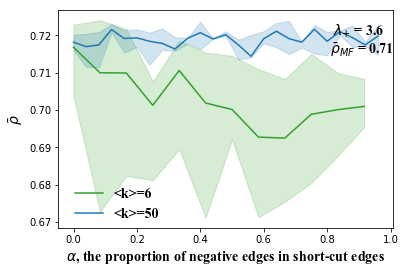

In [116]:
alpha1_array = np.arange(0,3,0.25)/3
rho_steady_list = [np.zeros(10) for i in range(len(alpha1_array))]
k1 = 0
for nn in range(1,11):
    k2 = 0
    for alpha1 in alpha1_array:
        sis_load = pickle.load(open(dir1+"prior_simplex1_sparse_"+str(round(alpha1,2))+"_"+str(nn)+".pkl", 'rb'))
        rho_steady_list[k2][k1]=sis_load.rho_steady_from_sim*1.17
        k2 += 1
    k1 += 1

colors=sns.color_palette('Paired',4)
fig, ax = plt.subplots()
color0 = colors[3]
x = np.arange(2.75,-0.25,-0.25)/3
y = [np.median(l) for l in rho_steady_list]
y1 = [l.max() for l in rho_steady_list]
y2 =  [l.min() for l in rho_steady_list]
ax.plot(x, y, '-',color=color0,label="<k>=6")
ax.fill_between(x, y2, y1,color=color0,alpha=0.2)
ax.set_xlabel('$\\alpha$'+', the proportion of negative edges in short-cut edges',axisfont)
ax.set_ylabel('$\\bar{\\rho}$',axisfont)

alpha1_array = np.arange(0,25,1)/25
rho_steady_list = [np.zeros(3) for i in range(len(alpha1_array))]
k1 = 0
for nn in range(1,4):
    k2 = 0
    for alpha1 in alpha1_array:
        sis_load = pickle.load(open(dir1+"prior_simplex1_dense_"+str(round(alpha1,2))+"_"+str(nn)+".pkl", 'rb'))
        rho_steady_list[k2][k1]=sis_load.rho_steady_from_sim*1.148
        k2 += 1
    k1 += 1
color0 = colors[1]
x = np.arange(0,25,1)/25
y = [np.median(l) for l in rho_steady_list]
y1 = [l.max() for l in rho_steady_list]
y2 =  [l.min() for l in rho_steady_list]
ax.plot(x, y, '-',color=color0,label="<k>=50")
ax.fill_between(x, y2, y1,color=color0,alpha=0.2)
ax.set_xlabel('$\\alpha$'+', the proportion of negative edges in short-cut edges',axisfont)
ax.set_ylabel('$\\bar{\\rho}$',axisfont)

ax.text(0.81,0.72,' $\\lambda_{+}$'+' = 3.6',chfont)
ax.text(0.81,0.715,'$\\bar{\\rho}_{MF}$'+' = 0.71',chfont)

fig.legend(loc=(0.17,0.17),frameon=False,prop={'family' : 'Times New Roman', 'size' : 14})
'''
fig.savefig(dir2+'二阶传播_长程边.png',dpi=500)
#fig.savefig(dir2+'小世界网络长程边负边比例.eps')
fig.savefig(dir2+'二阶传播_长程边.pdf',dpi=500)
'''